### Objective
In this homework, you will explore Bayesian inference using a real-world scenario: the 1997 chess match between Garry Kasparov and IBM's 
Deep Blue.  You will work through the Bayesian analysis step-by-step, understanding prior probabilities, likelihoods, posterior probabilities, and simulation.

### Introduction
In 1996, world chess champion (and human!) Gary Kasparov played a much anticipated six-game chess match against the IBM supercomputer Deep Blue. Of the six games, Kasparov won three, drew two, and lost one. Thus, Kasparov won the overall match, preserving the notion that machines don't perform as well as humans when it comes to chess. Yet Kasparov and Deep Blue were to meet again for a six-game match in 1997. Let π, denote Kasparov's chances of winning any particular game in the re-match. Thus, π is a measure of his overall skill relative to Deep Blue. Given the complexity of chess, machines, and humans, π is unknown and can vary or auctuate over time. Or, in short, π is a random variable.

In this analysis, we are investigating the probability of Garry Kasparov winning a game against IBM's Deep Blue. 
Using Bayesian inference, we update our beliefs about Kasparov's skill level based on prior knowledge and observed data.

The problem is structured as follows:

0. **Think**: Think about the problem and define the value/s we want to estimate.
1. **Prior Model**: We define initial beliefs about Kasparov's chances of winning a game before considering data.
2. **Binomial Data Model**: We use a Binomial distribution to model the number of games he wins out of six played.
3. **Likelihood Function**: We compute the probability of observing the actual game outcome for different win probabilities.
4. **Posterior Probability Model**: Using Bayes' Rule, we update our belief about Kasparov's skill after observing the match.
5. **Simulation**: We simulate possible match outcomes to verify our theoretical calculations.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from empiricaldist import Pmf

### Prior Probability Model

Before incorporating any data, we assume that Kasparov's probability of winning a single game, π, could be one of three values: 0.2, 0.5, or 0.8. 
Assign prior probabilities based on past performance and your own judgment.

In [ ]:
# Define the possible values for Kasparov's winning probability (π)
possible_pi = [0.2, 0.5, 0.8]

# π = 0.2:
#   - This value represents the scenario where Kasparov performs significantly below expectations.
#   - We assign it a 25% probability to capture the possibility that his performance might suffer due to unforeseen factors,
#     such as a slump in form or Deep Blue performing exceptionally well.
#
# π = 0.5:
#   - This value represents an evenly matched scenario between Kasparov and Deep Blue.
#   - Historical performance, such as the closely contested outcomes in previous games, suggests that a balanced win probability is the most likely.
#   - We assign this scenario the highest probability of 50% to represent our belief that an even contest is the norm.
#
# π = 0.8:
#   - This value represents the case where Kasparov outperforms expectations and wins most of his games.
#   - Although less likely than an even match, we consider it a realistic possibility given his skill.
#   - Therefore, we assign a 25% probability to this scenario, reflecting our belief that there is a reasonable chance of him excelling.

prior_probs = [0.25, 0.5, 0.25]

prior = Pmf(prior_probs, possible_pi)

prior


,probs
0.2,0.25
0.5,0.50
0.8,0.25


### Binomial Data Model

Kasparov played six games against Deep Blue in 1997. We define the random variable Y as the number of games Kasparov wins. 
This follows a Binomial distribution with parameters n = 6 (number of games) and π (his probability of winning each game).

We observed that he won only **one** game. Define, using the Binomial distribution, the likelihood PMF.

In [107]:
n_games = 6
observed_wins = 1

likelihoods = [stats.binom.pmf(observed_wins, n_games, pi) for pi in possible_pi]

likelihood_pmf = Pmf(likelihoods, possible_pi)
likelihood_pmf

,probs
0.2,0.393216
0.5,0.093750
0.8,0.001536


### Posterior Probability Model

Using Bayes' Rule, calculate the posterior probability for each possible π value. 
This represents our updated belief about Kasparov's win probability after observing the match results.


Posterior probabilities after observing 1 win in 6 games:
π = 0.2: Posterior Probability = 0.6753
π = 0.5: Posterior Probability = 0.3220
π = 0.8: Posterior Probability = 0.0026


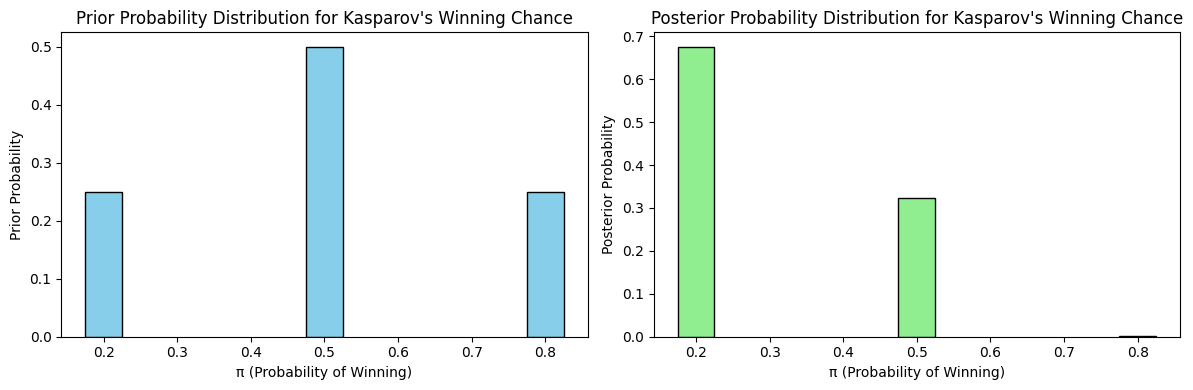

In [ ]:
# calculate posterior
posterior = prior * likelihood_pmf
posterior.normalize()

print("\nPosterior probabilities after observing 1 win in 6 games:")
for pi, post_prob in posterior.items():
    print(f"π = {pi}: Posterior Probability = {post_prob:.4f}")

plt.figure(figsize=(12, 4))

# Plot prior
plt.subplot(1, 2, 1)
plt.bar(prior.qs, prior.ps, width=0.05, color='skyblue', edgecolor='black')
plt.xlabel("π (Probability of Winning)")
plt.ylabel("Prior Probability")
plt.title("Prior Probability Distribution for Kasparov's Winning Chance")

# Plot posterior distribution
plt.subplot(1, 2, 2)
plt.bar(posterior.qs, posterior.ps, width=0.05, color='lightgreen', edgecolor='black')
plt.xlabel("π (Probability of Winning)")
plt.ylabel("Posterior Probability")
plt.title("Posterior Probability Distribution for Kasparov's Winning Chance")

plt.tight_layout()
plt.show()

### Posterior Simulation

To further analyze the problem:

- Simulate 50,000 matches using the prior model and observe how frequently each scenario occurs.
- Then, filter the simulations to those where Kasparov won exactly one game
- Compare the relative frequency of each π value.

In [109]:
n_simulations = 50000
n_games = 6
observed_wins = 1

simulated_matches = []
for _ in range(n_simulations):
    # Randomly choose a pi value based on the prior distribution
    pi = np.random.choice(possible_pi, p=prior.ps)
    # Simulate the number of wins Kasparov gets in 6 games
    wins = np.random.binomial(n_games, pi)
    # Record the pi value and the number of wins
    simulated_matches.append((pi, wins))

# Filter simulations where Kasparov won exactly 1 game
one_win_matches = [match[0] for match in simulated_matches if match[1] == observed_wins]

# Calculate the relative frequency of each pi value among the matches with exactly 1 win
pi_frequencies = {pi: one_win_matches.count(pi) / len(one_win_matches) for pi in possible_pi}

In [117]:
print(len(one_win_matches))

7201


In [110]:
print("\nRelative Frequencies of Each π Value (Kasparov Wins 1 Game):")
for pi, freq in pi_frequencies.items():
    print(f"π = {pi}: {freq:.4f}")


Relative Frequencies of Each π Value (Kasparov Wins 1 Game):
π = 0.2: 0.6800
π = 0.5: 0.3176
π = 0.8: 0.0024


### Visualizing the Results

Plot the prior and posterior probability distributions to illustrate how our belief in Kasparov's win probability has changed after observing the match outcome.


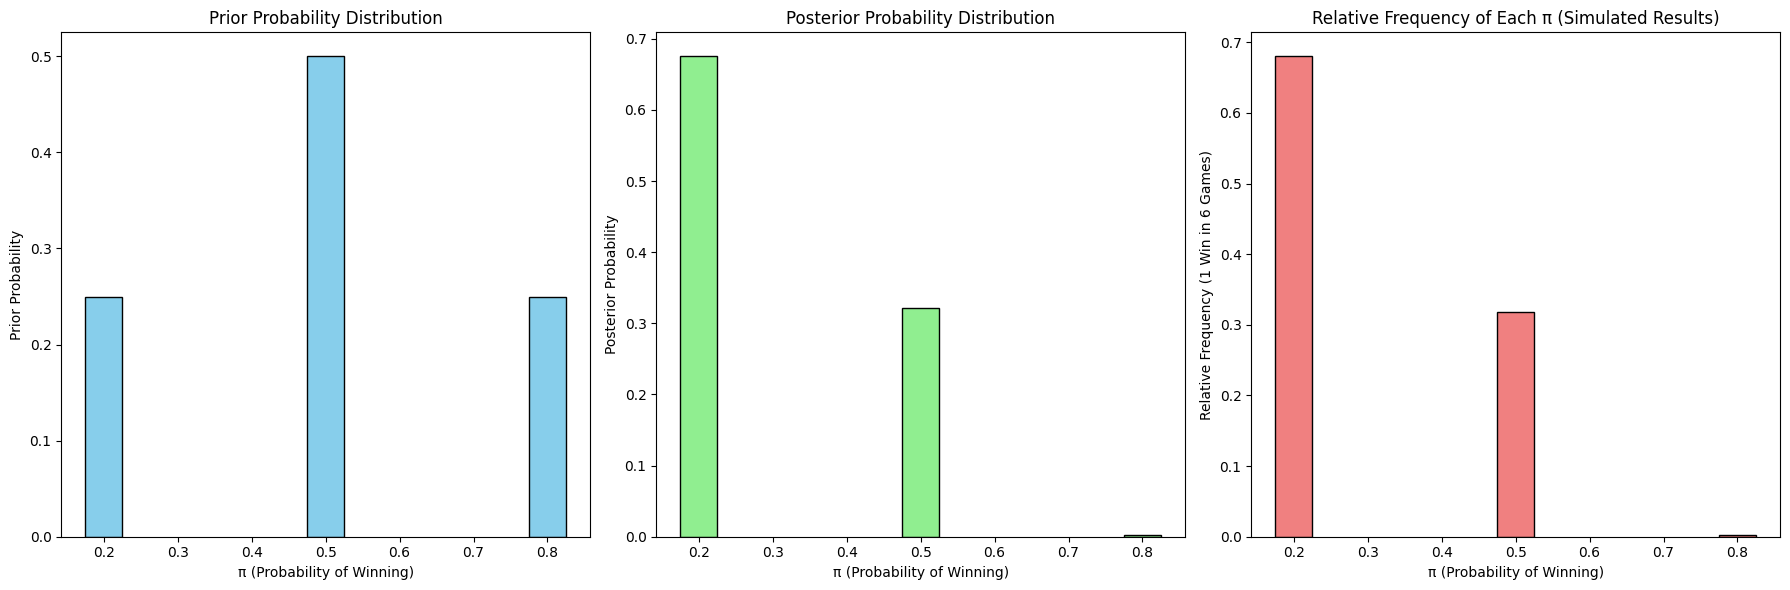

In [ ]:
plt.figure(figsize=(18, 6))

# Plot prior distribution
plt.subplot(1, 3, 1)
plt.bar(prior.qs, prior.ps, width=0.05, color='skyblue', edgecolor='black')
plt.xlabel("π (Probability of Winning)")
plt.ylabel("Prior Probability")
plt.title("Prior Probability Distribution")

# Plot posterior distribution
plt.subplot(1, 3, 2)
plt.bar(posterior.qs, posterior.ps, width=0.05, color='lightgreen', edgecolor='black')
plt.xlabel("π (Probability of Winning)")
plt.ylabel("Posterior Probability")
plt.title("Posterior Probability Distribution")

# Plot relative frequencies from simulation
plt.subplot(1, 3, 3)
plt.bar(pi_frequencies.keys(), pi_frequencies.values(), width=0.05, color='lightcoral', edgecolor='black')
plt.xlabel("π (Probability of Winning)")
plt.ylabel("Relative Frequency (1 Win in 6 Games)")
plt.title("Relative Frequency of Each π (Simulated Results)")

plt.tight_layout()
plt.show()

### Advanced Analysis

Repeat the entire process, but this time, use a different prior distribution and extend the analysis to include 100 possible values of π. Justify your choice of prior and explain how it reflects your assumptions about Kasparov's performance.

Now, let's assume Kasparov played two additional matches with the following outcomes:

- Kasparov wins 3 out of 6 games.
- Kasparov wins 2 out of 6 games.

Analyze the sensitivity of your results to the choice of prior. Discuss how different priors influence the posterior distribution and the overall conclusions drawn from the Bayesian analysis.

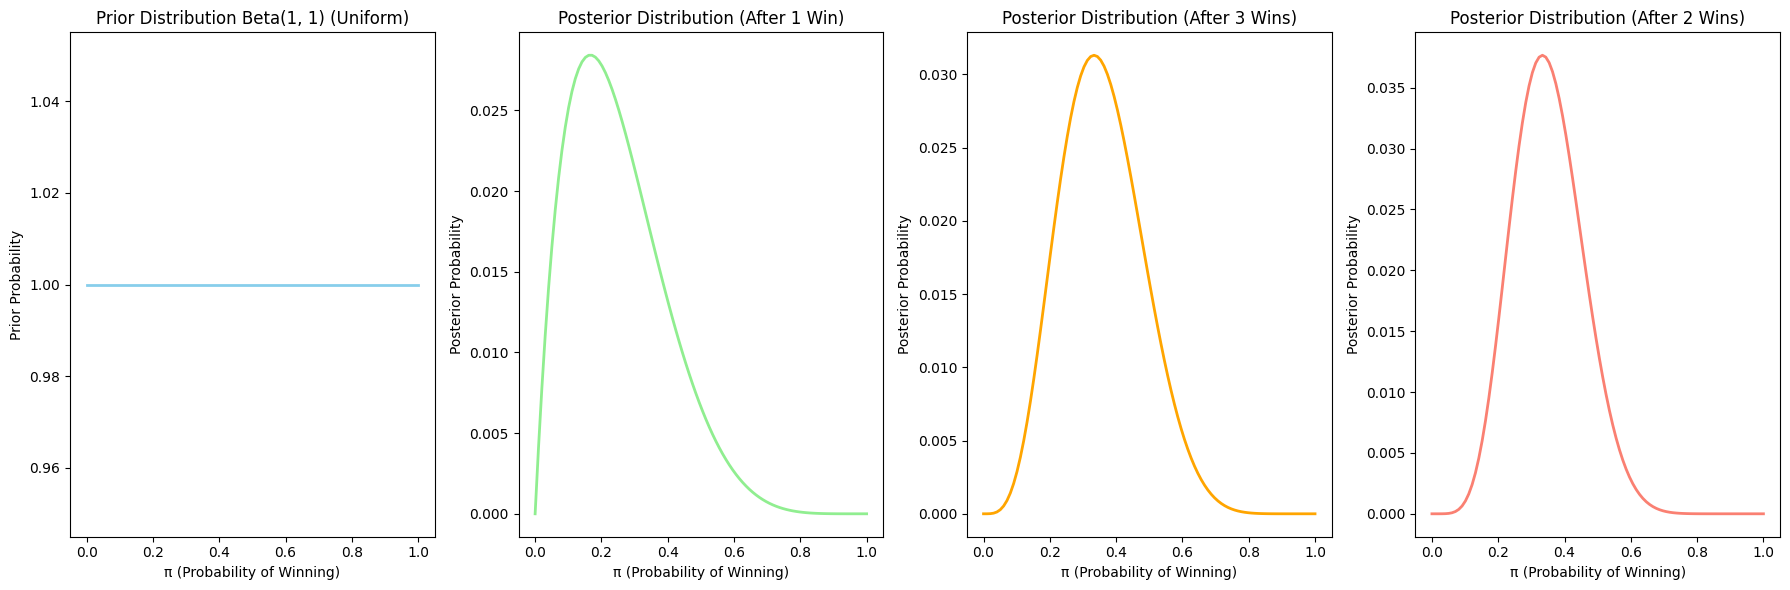

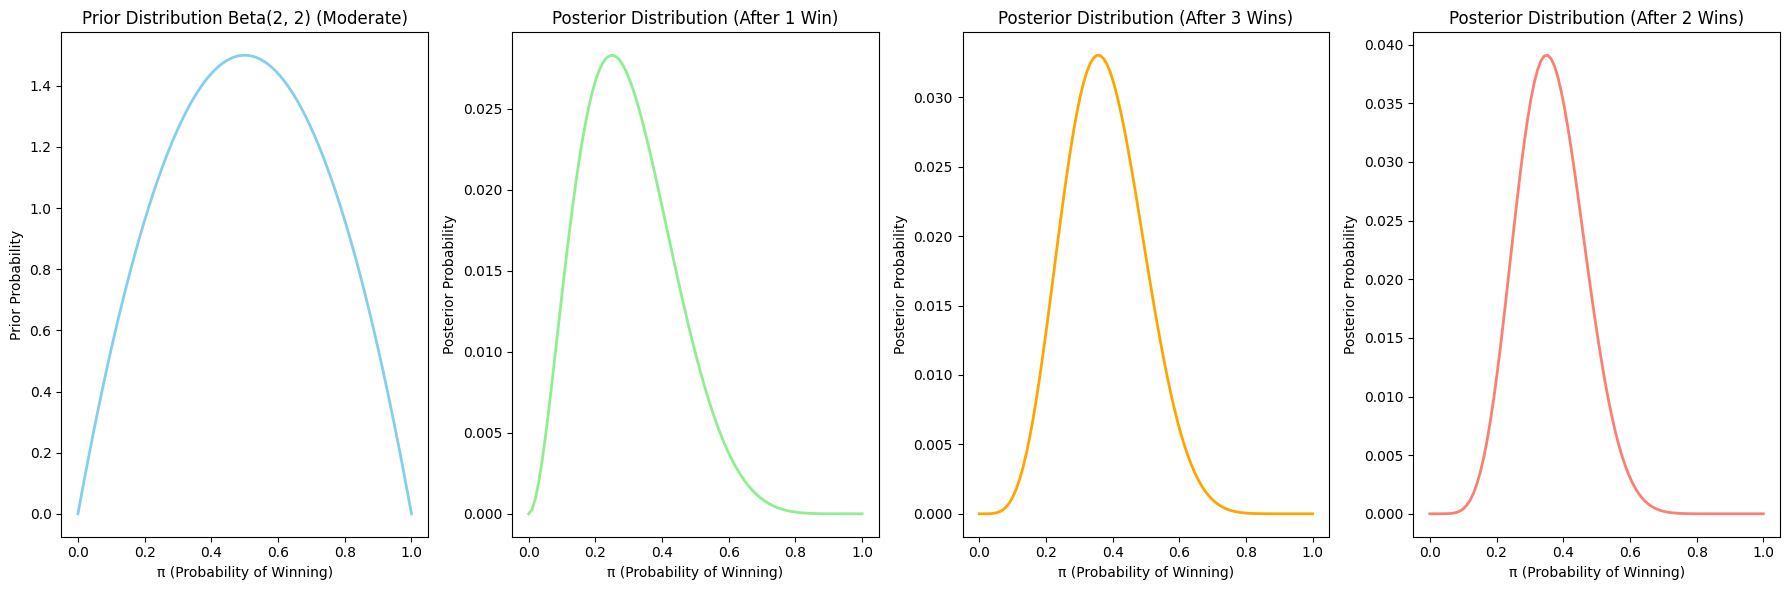

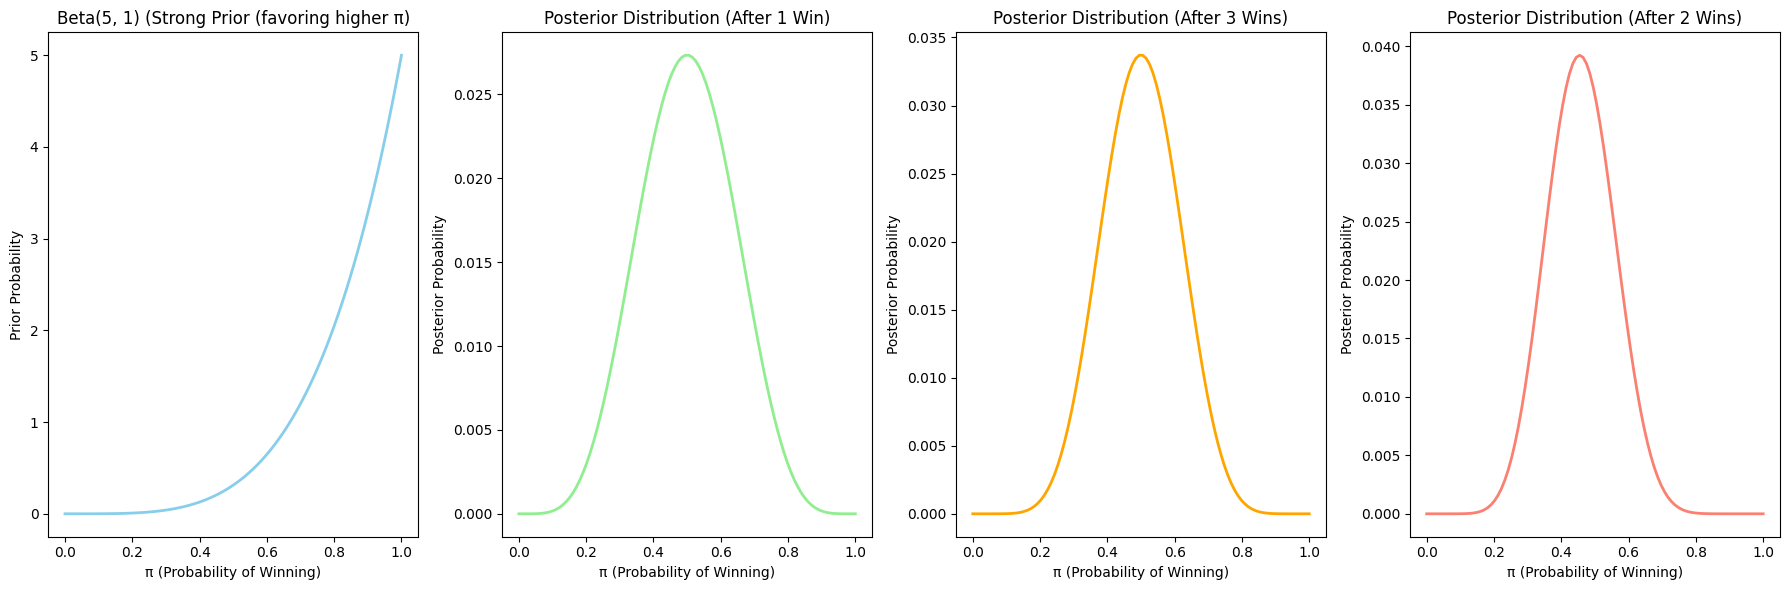

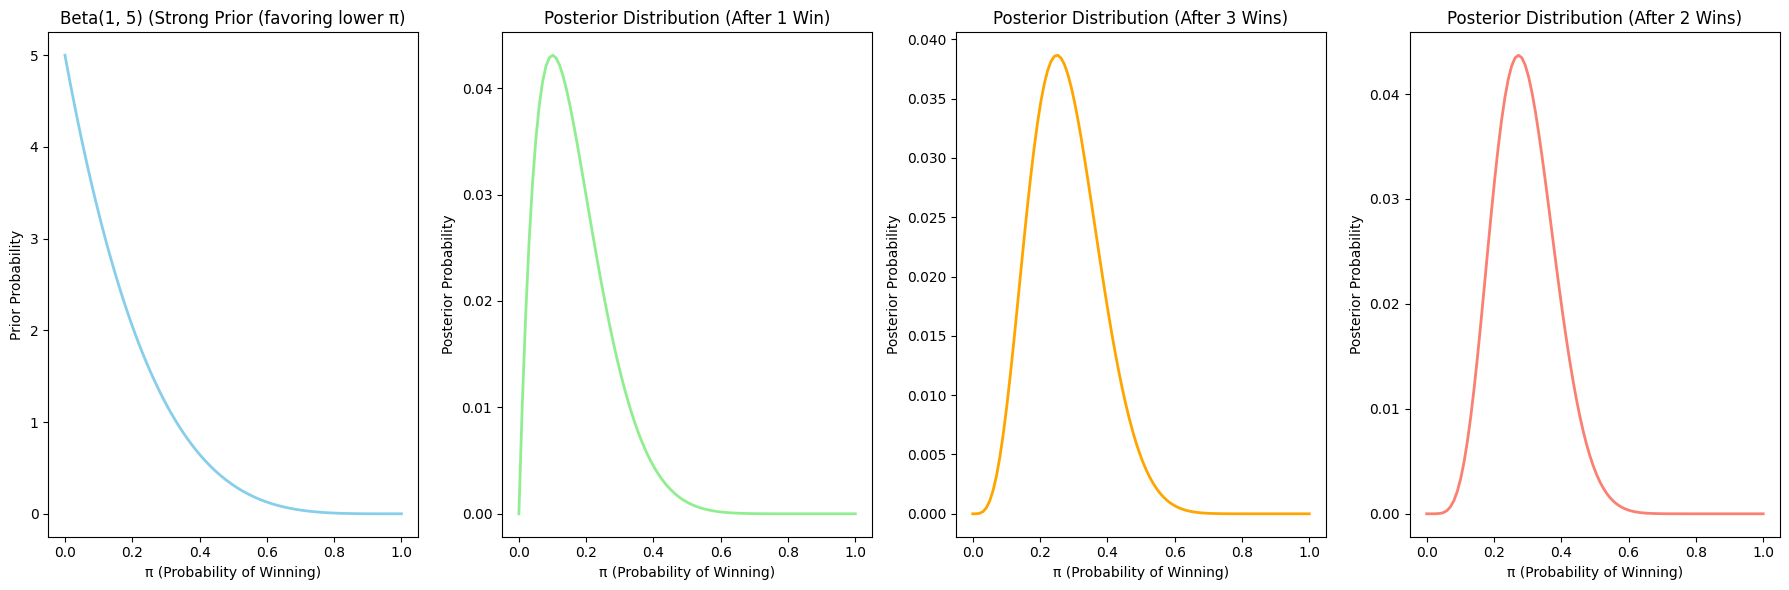

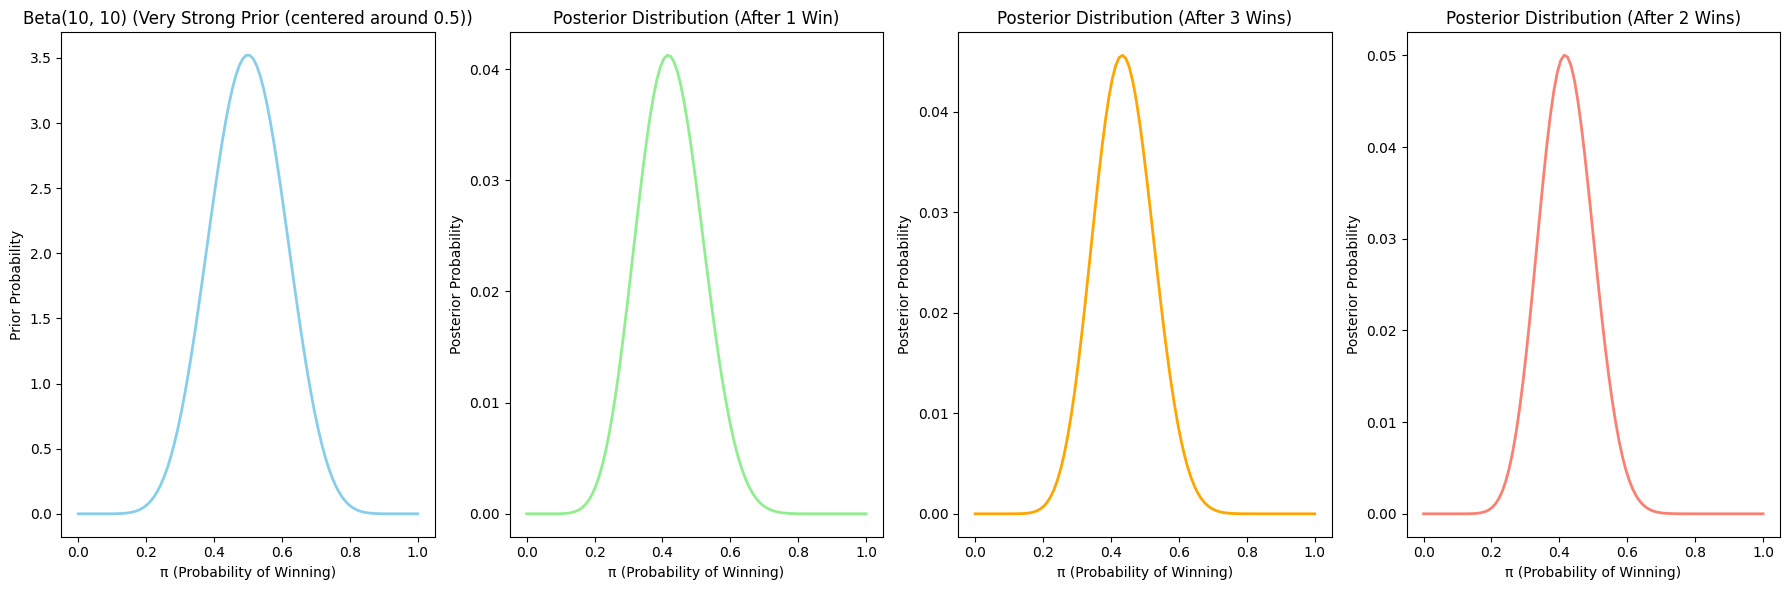

In [167]:
n_values = 100
pi_values = np.linspace(0, 1, n_values)  # 100 values between 0 and 1

prior_probs = Pmf(stats.beta.pdf(pi_values, 2, 2))  # Beta(2, 2) prior distribution
prior_probs.normalize()  
priors = [
    Pmf(stats.beta.pdf(pi_values, 1, 1), pi_values), # Beta(1, 1) - Uniform Prior
    Pmf(stats.beta.pdf(pi_values, 2, 2), pi_values), # Beta(2, 2) - Moderate Prior
    Pmf(stats.beta.pdf(pi_values, 5, 1), pi_values), # Beta(5, 1) - Strong Prior (favoring higher π)
    Pmf(stats.beta.pdf(pi_values, 1, 5), pi_values), # Beta(1, 5) - Strong Prior (favoring lower π)
    Pmf(stats.beta.pdf(pi_values, 10, 10), pi_values) # Beta(10, 10) - Very Strong Prior (centered around 0.5)
]

outcomes = [(1, 6), (3, 6), (2, 6)]  # (wins, total games) for each match

def likelihood(pi, observed_wins, n_games):
    return stats.binom.pmf(observed_wins, n_games, pi)


for idx,prior in enumerate(priors):
    posteriors = [prior.copy()]  
    # Update the posterior for each match outcome
    for observed_wins, n_games in outcomes:
        likelihoods = [likelihood(pi, observed_wins, n_games) for pi in pi_values]
        likelihood_pmf = Pmf(likelihoods, pi_values)
        new_posterior = posteriors[-1] * likelihood_pmf  
        new_posterior.normalize()  
        posteriors.append(new_posterior)

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 4, 1)
    plt.plot(pi_values, prior.ps, color='skyblue', label='Prior', lw=2)
    plt.xlabel("π (Probability of Winning)")
    plt.ylabel("Prior Probability")
    if idx == 0:
        plt.title("Prior Distribution Beta(1, 1) (Uniform)")
    elif idx == 1:
        plt.title("Prior Distribution Beta(2, 2) (Moderate)")
    elif idx == 2:
        plt.title("Beta(5, 1) (Strong Prior (favoring higher π)")
    elif idx == 3:
        plt.title("Beta(1, 5) (Strong Prior (favoring lower π)")
    elif idx == 4:
        plt.title("Beta(10, 10) (Very Strong Prior (centered around 0.5))")
    

    # Plot posterior distribution after first match (1 win)
    plt.subplot(1, 4, 2)
    plt.plot(pi_values, posteriors[1].ps, color='lightgreen', label='Posterior after 1 win', lw=2)
    plt.xlabel("π (Probability of Winning)")
    plt.ylabel("Posterior Probability")
    plt.title("Posterior Distribution (After 1 Win)")

    # Plot posterior distribution after second match (3 wins)
    plt.subplot(1, 4, 3)
    plt.plot(pi_values, posteriors[2].ps, color='orange', label='Posterior after 3 wins', lw=2)
    plt.xlabel("π (Probability of Winning)")
    plt.ylabel("Posterior Probability")
    plt.title("Posterior Distribution (After 3 Wins)")

    # Plot posterior distribution after third match (2 wins)
    plt.subplot(1, 4, 4)
    plt.plot(pi_values, posteriors[3].ps, color='salmon', label='Posterior after 2 wins', lw=2)
    plt.xlabel("π (Probability of Winning)")
    plt.ylabel("Posterior Probability")
    plt.title("Posterior Distribution (After 2 Wins)")

    plt.tight_layout()
    plt.show()

### Priors Breakdown:

1. **Beta(1, 1) - Uniform Prior**: 
   - This prior is **uniform**, meaning that we have no prior information about the probability of Kasparov winning a game. It's an uninformative prior where all values of $ \pi $ are equally likely.
   - This prior corresponds to a belief that any probability between 0 and 1 is equally likely.

2. **Beta(2, 2) - Moderate Prior**: 
   - This is a **moderate prior** that assumes a belief that the probability of Kasparov winning is equally likely to be near 0.5, with less belief in extreme values (very high or very low $ \pi $).
   - This prior is still relatively broad but assumes that values near 0.5 are more likely than extreme values.

3. **Beta(5, 1) - Strong Prior (favoring higher π)**:
   - This prior suggests a **strong belief** that Kasparov has a higher chance of winning, with values of $ \pi $ skewed towards 1 (Kasparov is more likely to win).
   - This reflects a belief that Kasparov is likely to perform well, perhaps due to his prior performance or confidence in his abilities.

4. **Beta(1, 5) - Strong Prior (favoring lower π)**:
   - This prior suggests a **strong belief** that Kasparov has a lower chance of winning, with values of $ \pi $ skewed towards 0 (Kasparov is less likely to win).
   - This would reflect a belief that Deep Blue might be significantly stronger.

5. **Beta(10, 10) - Very Strong Prior (centered around 0.5)**:
   - This is a **very strong prior** with a **sharp peak at $ \pi = 0.5 $**, suggesting that Kasparov has an approximately even chance of winning, with very little probability for extreme values of $ \pi $.
   - This prior is highly concentrated around 0.5 and assumes that Kasparov's probability of winning is near 50%.

### How the Priors Influence the Posterior:

The **posterior distribution** will depend on both the **prior** and the **data** (the match outcomes).

1. **For a more uniform prior** (like Beta(1, 1)), the posterior is likely **more spread out**, reflecting uncertainty in Kasparov's ability. The observed data will still influence the posterior, but the influence of the prior will be weaker.

2. **For a prior favoring higher $ \pi $** (like Beta(5, 1)), the posterior is **shifted towards higher values of $ \pi $**, reflecting the belief that Kasparov has a higher chance of winning. The data will still have an effect, but the posterior will be biased towards the assumption of Kasparov being a strong player.

3. **For a prior favoring lower $ \pi $** (like Beta(1, 5)), the posterior is **shifted towards lower values of $ \pi $**, indicating a belief that Deep Blue has a higher chance of winning, even though the data might suggest Kasparov's performance was better than expected.

4. **For a very strong prior** (like Beta(10, 10)), the posterior is **tight and centered around 0.5**, assuming Kasparov has an equal chance of winning. The observed data will still shift this, but the effect of the data will be more subtle compared to weaker priors.
